## 실습 1
###  상기 [그림 1] 의 그래프에 대해  "networkx'  파이썬 패키지를 사용하여 Prim 및 Kruskal 알고리즘 기반 MST 를 각각구해 보고, 그 결과가 앞의 알고리즘들을 적용한 결과와 같음을 살펴보시오.
![Alttext](fig15-graph.png)

In [1]:
# prim 알고리즘 함수
from heapq import *
def prim(G, s):  
    T, Q = list(), [(0, None, s)] 
    Explored = []
    while Q:
        weight, p, u = heappop(Q) 
        if u in Explored:
            continue
        else: Explored.append(u)    
        if p != None :   
            T.append((p, u, weight)) 
        for v, w in G[u]:          
            if (w, u, v ) not in Q and (w, v,u) not in Q and (u, v, w) not in T and (v, u, w) not in T:
                heappush(Q, (w, u, v))  
        if len(T) == len(G)-1:
            break 
    return T

In [2]:
# kruskal 알고리즘 함수
def naive_find(C, u): 
    while C[u] != u:
        u = C[u]   
    return u

def naive_union(C, u, v): 
    u = naive_find(C, u) 
    v = naive_find(C, v)
    C[u] = v 
    
def kruskal(G):
    E = [(w,u,v) for u in G for v, w in G[u] if u <=v ]    
    T = list() 
    Forest = {u:u for u in G} 
    for w, u, v in sorted(E): 
        if naive_find(Forest, u) != naive_find(Forest, v):             
            T.append((u, v, w))
            naive_union(Forest, u, v) 
        if len(T)==len(G)-1:
            break
    return T

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(edges, pos):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos=pos, node_size=2000, node_color='cyan')
    nx.draw_networkx_edges(G, pos=pos)
    nx.draw_networkx_labels(G, pos=pos, font_size=30)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=15)
    plt.show()

In [4]:
graph = {   'B': [['F',245], ['L', 115], ['N', 145], ['S', 175]],             
             'E': [['F', 450],['L', 645]],
             'F': [['B', 245], ['E', 450],['L', 220], ['N', 385]],
             'L': [['B', 115], ['E', 645],['F', 220],['N', 260],['S', 125]],
             'N': [['B', 145], ['F', 385],['L', 260],['S', 320]],
             'S': [['B', 175], ['L', 125],['N', 320]]}


In [5]:
prim(graph, 'B')

[('B', 'L', 115),
 ('L', 'S', 125),
 ('B', 'N', 145),
 ('L', 'F', 220),
 ('F', 'E', 450)]

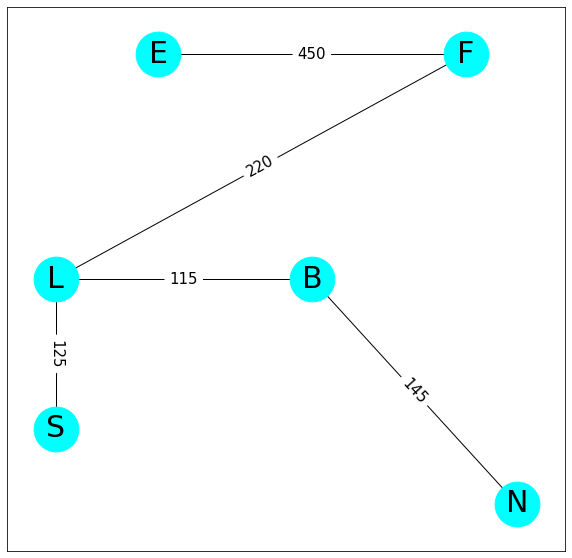

In [6]:
edges = prim(graph, 'B')
pos = {'E':(3, 7), 'F':(9, 7), 'L':(1, 4), 
       'B':(6, 4), 'S':(1, 2), 'N':(10, 1)}
draw_graph(edges, pos)

In [7]:
kruskal(graph)

[('B', 'L', 115),
 ('L', 'S', 125),
 ('B', 'N', 145),
 ('F', 'L', 220),
 ('E', 'F', 450)]

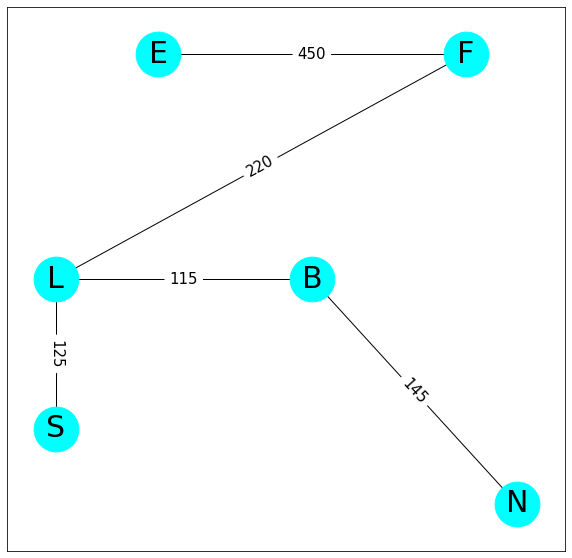

In [8]:
edges = kruskal(graph)
pos = {'E':(3, 7), 'F':(9, 7), 'L':(1, 4), 
       'B':(6, 4), 'S':(1, 2), 'N':(10, 1)}
draw_graph(edges, pos)

## 실습 2.  
### 실습 2.  상기 [그림 3] 의 그래프에 대해  "networkx'  파이썬 패키지를 사용하여 Prim 및 Kruskal 알고리즘 기반 MST 를 각각구해 보고, 그 결과가 앞의 알고리즘들을 적용한 결과와 같음을 살펴보시오.
![Alttext](fig15-prim_ex.png)

In [9]:
# prim 알고리즘 함수
from heapq import *
def prim(G, s):  
    T, Q = list(), [(0, None, s)] 
    Explored = []
    while Q:
        weight, p, u = heappop(Q) 
        if u in Explored:
            continue
        else: Explored.append(u)    
        if p != None :   
            T.append((p, u, weight)) 
        for v, w in G[u]:          
            if (w, u, v ) not in Q and (w, v,u) not in Q and (u, v, w) not in T and (v, u, w) not in T:
                heappush(Q, (w, u, v))  
        if len(T) == len(G)-1:
            break 
    return T

In [10]:
# kruskal 알고리즘 함수
def naive_find(C, u): 
    while C[u] != u:
        u = C[u]   
    return u

def naive_union(C, u, v): 
    u = naive_find(C, u) 
    v = naive_find(C, v)
    C[u] = v 
    
def kruskal(G):
    E = [(w,u,v) for u in G for v, w in G[u] if u <=v ]    
    T = list() 
    Forest = {u:u for u in G} 
    for w, u, v in sorted(E): 
        if naive_find(Forest, u) != naive_find(Forest, v):             
            T.append((u, v, w))
            naive_union(Forest, u, v) 
        if len(T)==len(G)-1:
            break
    return T

In [11]:
graph = {'A': [['B', 4], ['D', 1]],
        'B': [['A', 4], ['C',4], ['D', 4], ['J', 10]],
        'C': [['B', 4], ['E', 2], ['F', 1]],
        'D': [['A', 1], ['B', 4], ['H', 5],['J', 6]],
        'E': [['C', 2],['G', 2]],
        'F': [['C', 1],['G', 3],['I', 5]],
        'G': [['E', 2], ['F', 3],['I', 3], ['J', 4]],
        'H': [['D', 5],['J', 2]],  
        'I': [['F', 5],['G', 3],['J', 3]],
        'J': [['B', 10], ['D', 6],['G', 4],['H', 2],['I', 3]]}

In [12]:
prim(graph, 'B')

[('B', 'A', 4),
 ('A', 'D', 1),
 ('B', 'C', 4),
 ('C', 'F', 1),
 ('C', 'E', 2),
 ('E', 'G', 2),
 ('G', 'I', 3),
 ('I', 'J', 3),
 ('J', 'H', 2)]

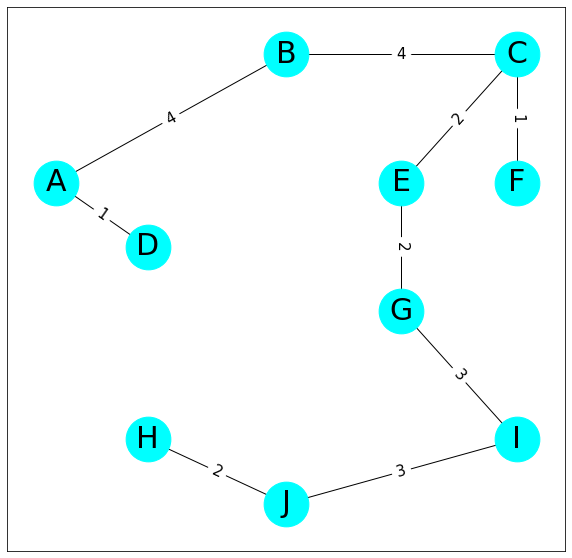

In [13]:
edges = prim(graph, 'B')
pos = {'A':(0, 0), 'B':(5, 2), 'C':(10, 2), 'D':(2, -1), 
       'E':(7.5, 0), 'F':(10, 0), 'G':(7.5, -2), 
       'H':(2, -4), 'I':(10, -4), 'J':(5, -5)}
draw_graph(edges, pos)

In [14]:
kruskal(graph)


[('A', 'D', 1),
 ('C', 'F', 1),
 ('C', 'E', 2),
 ('E', 'G', 2),
 ('H', 'J', 2),
 ('G', 'I', 3),
 ('I', 'J', 3),
 ('A', 'B', 4),
 ('B', 'C', 4)]

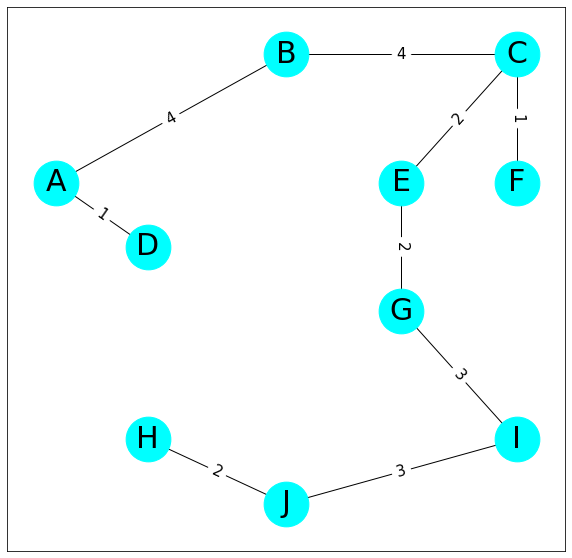

In [15]:
edges = kruskal(graph)
pos = {'A':(0, 0), 'B':(5, 2), 'C':(10, 2), 'D':(2, -1), 
       'E':(7.5, 0), 'F':(10, 0), 'G':(7.5, -2), 
       'H':(2, -4), 'I':(10, -4), 'J':(5, -5)}
draw_graph(edges, pos)